In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
name = []
vehicle_details = []
mileage = []
rating = []
rating_count = []
price = []
deal_status = []
link = []

for i in range(1,1000):
    website = "https://www.cars.com/shopping/results/?page=" + str(i) + "&page_size=20&list_price_max=&makes[]=&maximum_distance=all&models[]=&stock_type=cpo&zip="
        
    #request to the website
    response = requests.get(website)
    
    #creating the soup object
    soup = BeautifulSoup(response.content, "html.parser")
    
    #getting all the page results in one variable
    results = soup.find_all('div', {'class':'vehicle-card'})
    
    #appending the values in the results, into the respective variables
    for result in results:
        
      
        
        #name
        try:
            name.append(result.find('p', {'class':'stock-type'}).get_text())
        except:
            name.append('Nan')
      
        #vehicle_details
        try:
            vehicle_details.append(result.find('h2').get_text())
        except:
            vehicle_details.append('Nan')
        
      #mileage
        try:
            mileage.append(result.find('div',{'class':'mileage'}).get_text())
        except:
            mileage.append('Nan')
        
      #rating
        try:
            rating.append(result.find('span',{'class':'sds-rating__count'}).get_text())
        except:
            rating.append('Nan')
        
      #number of rating counts
        try:
            rating_count.append(result.find('span',{'class':'sds-rating__link sds-button-link'}).get_text())
        except:
            rating_count.append('Nan')
        
      #car price
        try:
            price.append(result.find('span',{'class':'primary-price'}).get_text())
        except:
            price.append('Nan')
        
      #deal status
        try:
            deal_status.append(result.find('span',{'class':'sds-badge__label'}).get_text())
        except:
            deal_status.append('Nan')

In [6]:
len(name)

19577

In [28]:
Name = name[20123:40246]

In [29]:
len(Name)

20123

In [7]:
len(vehicle_details)

19577

In [8]:
len(mileage)

19577

In [9]:
len(rating)

19577

In [10]:
len(rating_count)

19577

In [11]:
len(price)

19577

In [12]:
len(deal_status)

19577

In [13]:
df = pd.DataFrame({
    'Name': name,
    'Vehicle_details': vehicle_details,
    'Mileage': mileage,
    'Rating' : rating,
    'Rating-Count' : rating_count,
    'Price' : price,
    'Deal-Status' : deal_status
})

In [14]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status
0,Porsche Certified,2018 Porsche 718 Cayman S,"7,399 mi.",4.7,(153 reviews),"$79,990","Good Deal | $2,460 under"
1,Honda Certified,2021 Honda Civic Type R Touring,"18,154 mi.",3.4,"(1,123 reviews)","$46,498",Good Deal
2,Volkswagen Certified,2019 Volkswagen Passat 2.0T SE R-Line,"26,995 mi.",4.9,(53 reviews),"$23,899","Great Deal | $1,404 under"
3,Volkswagen Certified,2022 Volkswagen Jetta 1.5T Sport,"6,777 mi.",2.3,(63 reviews),"$26,500",CPO Warrantied
4,INFINITI Certified,2022 INFINITI QX50 LUXE,"1,109 mi.",3.8,(119 reviews),"$37,473",CPO Warrantied
...,...,...,...,...,...,...,...
19572,Honda Certified,2022 Honda Accord Hybrid Sport,"10,411 mi.",4.5,(713 reviews),"$35,543",Good Deal
19573,RAM Certified,2022 RAM 1500 Lone Star,"3,439 mi.",Nan,(36 reviews),"$42,900",CPO Warrantied
19574,Cadillac Certified,2021 Cadillac Escalade Premium Luxury,"36,667 mi.",4.9,"(2,019 reviews)","$86,990",CPO Warrantied
19575,Jeep Certified,2020 Jeep Cherokee Latitude,"61,249 mi.",3.1,(528 reviews),"$22,000","Great Deal | $3,063 under"


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19577 entries, 0 to 19576
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             19577 non-null  string
 1   Vehicle_details  19577 non-null  object
 2   Mileage          19577 non-null  object
 3   Rating           19577 non-null  object
 4   Rating-Count     19577 non-null  object
 5   Price            19577 non-null  object
 6   Deal-Status      19577 non-null  object
 7   Year             19577 non-null  int64 
 8   Status           19577 non-null  object
dtypes: int64(1), object(7), string(1)
memory usage: 1.3+ MB


In [ ]:
df['Vehicle']

In [15]:
df['Name'].value_counts()

Toyota Certified           2568
Ford Certified             2072
Honda Certified            2062
BMW Certified              1822
Volkswagen Certified       1485
Cadillac Certified         1020
GMC Certified              1006
Jeep Certified              951
Kia Certified               901
Acura Certified             834
RAM Certified               803
Buick Certified             669
Chevrolet Certified         639
Porsche Certified           592
Volvo Certified             533
Nissan Certified            413
INFINITI Certified          322
Dodge Certified             270
Subaru Certified            166
Chrysler Certified           92
Maserati Certified           77
Mercedes-Benz Certified      69
Ferrari Certified            62
Rolls-Royce Certified        49
Aston Martin Certified       37
Bentley Certified            35
MINI Certified               18
Alfa Romeo Certified          6
FIAT Certified                3
Mitsubishi Certified          1
Name: Name, dtype: int64

In [16]:
df['Rating-Count'] =  df['Rating-Count'].apply(lambda x : x.strip('(').strip(')'))

In [17]:
df['Rating-Count'] =  df['Rating-Count'].apply(lambda x : x.strip('reviews'))

In [18]:
df['Mileage'] = df['Mileage'].apply(lambda x : x.strip('mi.'))

In [19]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [20]:
df['Name'] = df['Name'].str.replace('Certified', '')

In [21]:
df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status
0,Porsche,2018 Porsche 718 Cayman S,"7,399",4.7,153,"79,990","Good Deal | $2,460 under"
1,Honda,2021 Honda Civic Type R Touring,"18,154",3.4,"1,123","46,498",Good Deal
2,Volkswagen,2019 Volkswagen Passat 2.0T SE R-Line,"26,995",4.9,53,"23,899","Great Deal | $1,404 under"
3,Volkswagen,2022 Volkswagen Jetta 1.5T Sport,"6,777",2.3,63,"26,500",CPO Warrantied
4,INFINITI,2022 INFINITI QX50 LUXE,"1,109",3.8,119,"37,473",CPO Warrantied


In [22]:
df['Name'].value_counts()

Toyota            2568
Ford              2072
Honda             2062
BMW               1822
Volkswagen        1485
Cadillac          1020
GMC               1006
Jeep               951
Kia                901
Acura              834
RAM                803
Buick              669
Chevrolet          639
Porsche            592
Volvo              533
Nissan             413
INFINITI           322
Dodge              270
Subaru             166
Chrysler            92
Maserati            77
Mercedes-Benz       69
Ferrari             62
Rolls-Royce         49
Aston Martin        37
Bentley             35
MINI                18
Alfa Romeo           6
FIAT                 3
Mitsubishi           1
Name: Name, dtype: int64

In [23]:
df.shape

(19577, 7)

In [24]:
df['Year'] = (df['Vehicle_details'].str.extract(r'(?P<Year>\d+(?:\.\d+)?)')
                 .applymap(str.strip))

In [25]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year
0,Porsche,2018 Porsche 718 Cayman S,"7,399",4.7,153,"79,990","Good Deal | $2,460 under",2018
1,Honda,2021 Honda Civic Type R Touring,"18,154",3.4,"1,123","46,498",Good Deal,2021
2,Volkswagen,2019 Volkswagen Passat 2.0T SE R-Line,"26,995",4.9,53,"23,899","Great Deal | $1,404 under",2019
3,Volkswagen,2022 Volkswagen Jetta 1.5T Sport,"6,777",2.3,63,"26,500",CPO Warrantied,2022
4,INFINITI,2022 INFINITI QX50 LUXE,"1,109",3.8,119,"37,473",CPO Warrantied,2022
...,...,...,...,...,...,...,...,...
19572,Honda,2022 Honda Accord Hybrid Sport,"10,411",4.5,713,"35,543",Good Deal,2022
19573,RAM,2022 RAM 1500 Lone Star,"3,439",Nan,36,"42,900",CPO Warrantied,2022
19574,Cadillac,2021 Cadillac Escalade Premium Luxury,"36,667",4.9,"2,019","86,990",CPO Warrantied,2021
19575,Jeep,2020 Jeep Cherokee Latitude,"61,249",3.1,528,"22,000","Great Deal | $3,063 under",2020


In [26]:
df['Year'].value_counts()

2020    5457
2021    5272
2022    4618
2019    2205
2018    1597
2017     216
2023      82
2016      67
2014      23
2015      19
2013      11
2012       4
2011       4
2010       2
Name: Year, dtype: int64

In [27]:
df.loc[df['Year'] == '2023']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year
62,Toyota,2023 Toyota Camry SE Nightsh,"1,850",1.0,12,"32,121",CPO Warrantied,2023
77,Jeep,2023 Jeep Grand Cherokee Altitude,950,4.3,"1,479","42,299",CPO Warrantied,2023
79,Cadillac,2023 Cadillac Escalade ESV Premium Luxury,"3,106",4.7,56,"108,782",CPO Warrantied,2023
83,Toyota,2023 Toyota Camry SE,825,4.5,190,"31,194",CPO Warrantied,2023
94,Kia,2023 Kia Sportage Hybrid LX,"2,000",3.9,266,"33,111",CPO Warrantied,2023
...,...,...,...,...,...,...,...,...
9537,Kia,2023 Kia K5 GT-Line,"1,517",4.8,948,"31,171",CPO Warrantied,2023
9550,Acura,2023 Acura Integra A-Spec Technology,728,3.4,283,"39,121",CPO Warrantied,2023
9647,Jeep,2023 Jeep Grand Cherokee L Laredo,550,4.7,189,"52,687",CPO Warrantied,2023
9783,Toyota,2023 Toyota Camry XSE,"1,494",4.1,397,"38,973",CPO Warrantied,2023


In [28]:
df['Status'] = df['Deal-Status'].map(lambda x: str(x)[:9])

In [29]:
df['Status'].value_counts()

Good Deal    7703
Great Dea    7275
CPO Warra    3405
Fair Deal    1181
Hot Car        13
Name: Status, dtype: int64

In [30]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
0,Porsche,2018 Porsche 718 Cayman S,"7,399",4.7,153,"79,990","Good Deal | $2,460 under",2018,Good Deal
1,Honda,2021 Honda Civic Type R Touring,"18,154",3.4,"1,123","46,498",Good Deal,2021,Good Deal
2,Volkswagen,2019 Volkswagen Passat 2.0T SE R-Line,"26,995",4.9,53,"23,899","Great Deal | $1,404 under",2019,Great Dea
3,Volkswagen,2022 Volkswagen Jetta 1.5T Sport,"6,777",2.3,63,"26,500",CPO Warrantied,2022,CPO Warra
4,INFINITI,2022 INFINITI QX50 LUXE,"1,109",3.8,119,"37,473",CPO Warrantied,2022,CPO Warra
...,...,...,...,...,...,...,...,...,...
19572,Honda,2022 Honda Accord Hybrid Sport,"10,411",4.5,713,"35,543",Good Deal,2022,Good Deal
19573,RAM,2022 RAM 1500 Lone Star,"3,439",Nan,36,"42,900",CPO Warrantied,2022,CPO Warra
19574,Cadillac,2021 Cadillac Escalade Premium Luxury,"36,667",4.9,"2,019","86,990",CPO Warrantied,2021,CPO Warra
19575,Jeep,2020 Jeep Cherokee Latitude,"61,249",3.1,528,"22,000","Great Deal | $3,063 under",2020,Great Dea


In [31]:
df['Status'] = df['Status'].str.replace('CPO Warra', 'Unknown')

In [32]:
df['Status'] = df['Status'].str.replace('Hot Car', 'Unknown')

In [33]:
df['Status'] = df['Status'].str.replace('Great Dea', 'Great')

In [34]:
df['Status'] = df['Status'].str.replace('Good Deal', 'Good')

In [35]:
df['Status'] = df['Status'].str.replace('Fair Deal', 'Fair')

In [36]:
df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
0,Porsche,2018 Porsche 718 Cayman S,"7,399",4.7,153,"79,990","Good Deal | $2,460 under",2018,Good
1,Honda,2021 Honda Civic Type R Touring,"18,154",3.4,"1,123","46,498",Good Deal,2021,Good
2,Volkswagen,2019 Volkswagen Passat 2.0T SE R-Line,"26,995",4.9,53,"23,899","Great Deal | $1,404 under",2019,Great
3,Volkswagen,2022 Volkswagen Jetta 1.5T Sport,"6,777",2.3,63,"26,500",CPO Warrantied,2022,Unknown
4,INFINITI,2022 INFINITI QX50 LUXE,"1,109",3.8,119,"37,473",CPO Warrantied,2022,Unknown
...,...,...,...,...,...,...,...,...,...
19572,Honda,2022 Honda Accord Hybrid Sport,"10,411",4.5,713,"35,543",Good Deal,2022,Good
19573,RAM,2022 RAM 1500 Lone Star,"3,439",Nan,36,"42,900",CPO Warrantied,2022,Unknown
19574,Cadillac,2021 Cadillac Escalade Premium Luxury,"36,667",4.9,"2,019","86,990",CPO Warrantied,2021,Unknown
19575,Jeep,2020 Jeep Cherokee Latitude,"61,249",3.1,528,"22,000","Great Deal | $3,063 under",2020,Great


In [37]:
df['Status'].value_counts()

Good       7703
Great      7275
Unknown    3418
Fair       1181
Name: Status, dtype: int64

In [38]:
df['Name'] = df['Name'].str.strip()

In [39]:
df.loc[df['Name'] == 'Ford']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
24,Ford,2017 Ford Expedition EL XLT,"96,942",4.7,"2,368","27,951","Great Deal | $3,271 under",2017,Great
50,Ford,2022 Ford Bronco Sport Base,"10,888",4.9,"1,518","31,000",Good Deal | $865 under,2022,Good
86,Ford,2020 Ford F-150 XLT,"18,141",2.6,210,"44,590",Good Deal | $958 under,2020,Good
98,Ford,2020 Ford Expedition Limited,"49,998",4.5,745,"51,974","Good Deal | $1,926 under",2020,Good
99,Ford,2021 Ford Expedition XL,"12,062",3.5,525,"48,499","Good Deal | $1,144 under",2021,Good
...,...,...,...,...,...,...,...,...,...
19522,Ford,2020 Ford Expedition XLT,"20,889",4.4,"1,750","50,993","Great Deal | $3,128 under",2020,Great
19539,Ford,2021 Ford F-350 XL,"34,867",4.9,514,"58,995",Fair Deal,2021,Fair
19541,Ford,2020 Ford Expedition XLT,"20,889",4.4,"1,750","50,993","Great Deal | $3,128 under",2020,Great
19558,Ford,2021 Ford F-350 XL,"34,867",4.9,514,"58,995",Fair Deal,2021,Fair


In [40]:
df['Mileage'] = df['Mileage'].str.strip(',')

In [41]:
df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
0,Porsche,2018 Porsche 718 Cayman S,"7,399",4.7,153,"79,990","Good Deal | $2,460 under",2018,Good
1,Honda,2021 Honda Civic Type R Touring,"18,154",3.4,"1,123","46,498",Good Deal,2021,Good
2,Volkswagen,2019 Volkswagen Passat 2.0T SE R-Line,"26,995",4.9,53,"23,899","Great Deal | $1,404 under",2019,Great
3,Volkswagen,2022 Volkswagen Jetta 1.5T Sport,"6,777",2.3,63,"26,500",CPO Warrantied,2022,Unknown
4,INFINITI,2022 INFINITI QX50 LUXE,"1,109",3.8,119,"37,473",CPO Warrantied,2022,Unknown


In [50]:
details = df['Vehicle_details'].str.split(pat = ':', n=1, expand = True)

In [51]:
details

,0
0,2018 Porsche 718 Cayman S
1,2021 Honda Civic Type R Touring
2,2019 Volkswagen Passat 2.0T SE R-Line
3,2022 Volkswagen Jetta 1.5T Sport
4,2022 INFINITI QX50 LUXE
...,...
19572,2022 Honda Accord Hybrid Sport
19573,2022 RAM 1500 Lone Star
19574,2021 Cadillac Escalade Premium Luxury
19575,2020 Jeep Cherokee Latitude


In [42]:
df.replace(',','', regex=True, inplace=True)

In [43]:
df.to_csv('new_df.csv')

In [44]:
df.loc[df['Status'] == 'Fair']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
16,Cadillac,2020 Cadillac CT4 V-Series,20162,4.3,498,42762,Fair Deal,2020,Fair
21,Toyota,2020 Toyota Sienna LE,48681,4.3,961,37742,Fair Deal,2020,Fair
22,Volvo,2022 Volvo S60 Recharge Plug-In Hybrid T8 Pole...,3462,4.9,2206,61000,Fair Deal,2022,Fair
45,Volvo,2022 Volvo S60 Recharge Plug-In Hybrid T8 Pole...,3462,4.9,2206,61000,Fair Deal,2022,Fair
56,BMW,2020 BMW 745e 745e xDrive iPerformance,39639,4.0,537,65990,Fair Deal,2020,Fair
...,...,...,...,...,...,...,...,...,...
19482,Ford,2021 Ford F-350 XL,34867,4.9,514,58995,Fair Deal,2021,Fair
19501,Ford,2021 Ford F-350 XL,34867,4.9,514,58995,Fair Deal,2021,Fair
19520,Ford,2021 Ford F-350 XL,34867,4.9,514,58995,Fair Deal,2021,Fair
19539,Ford,2021 Ford F-350 XL,34867,4.9,514,58995,Fair Deal,2021,Fair


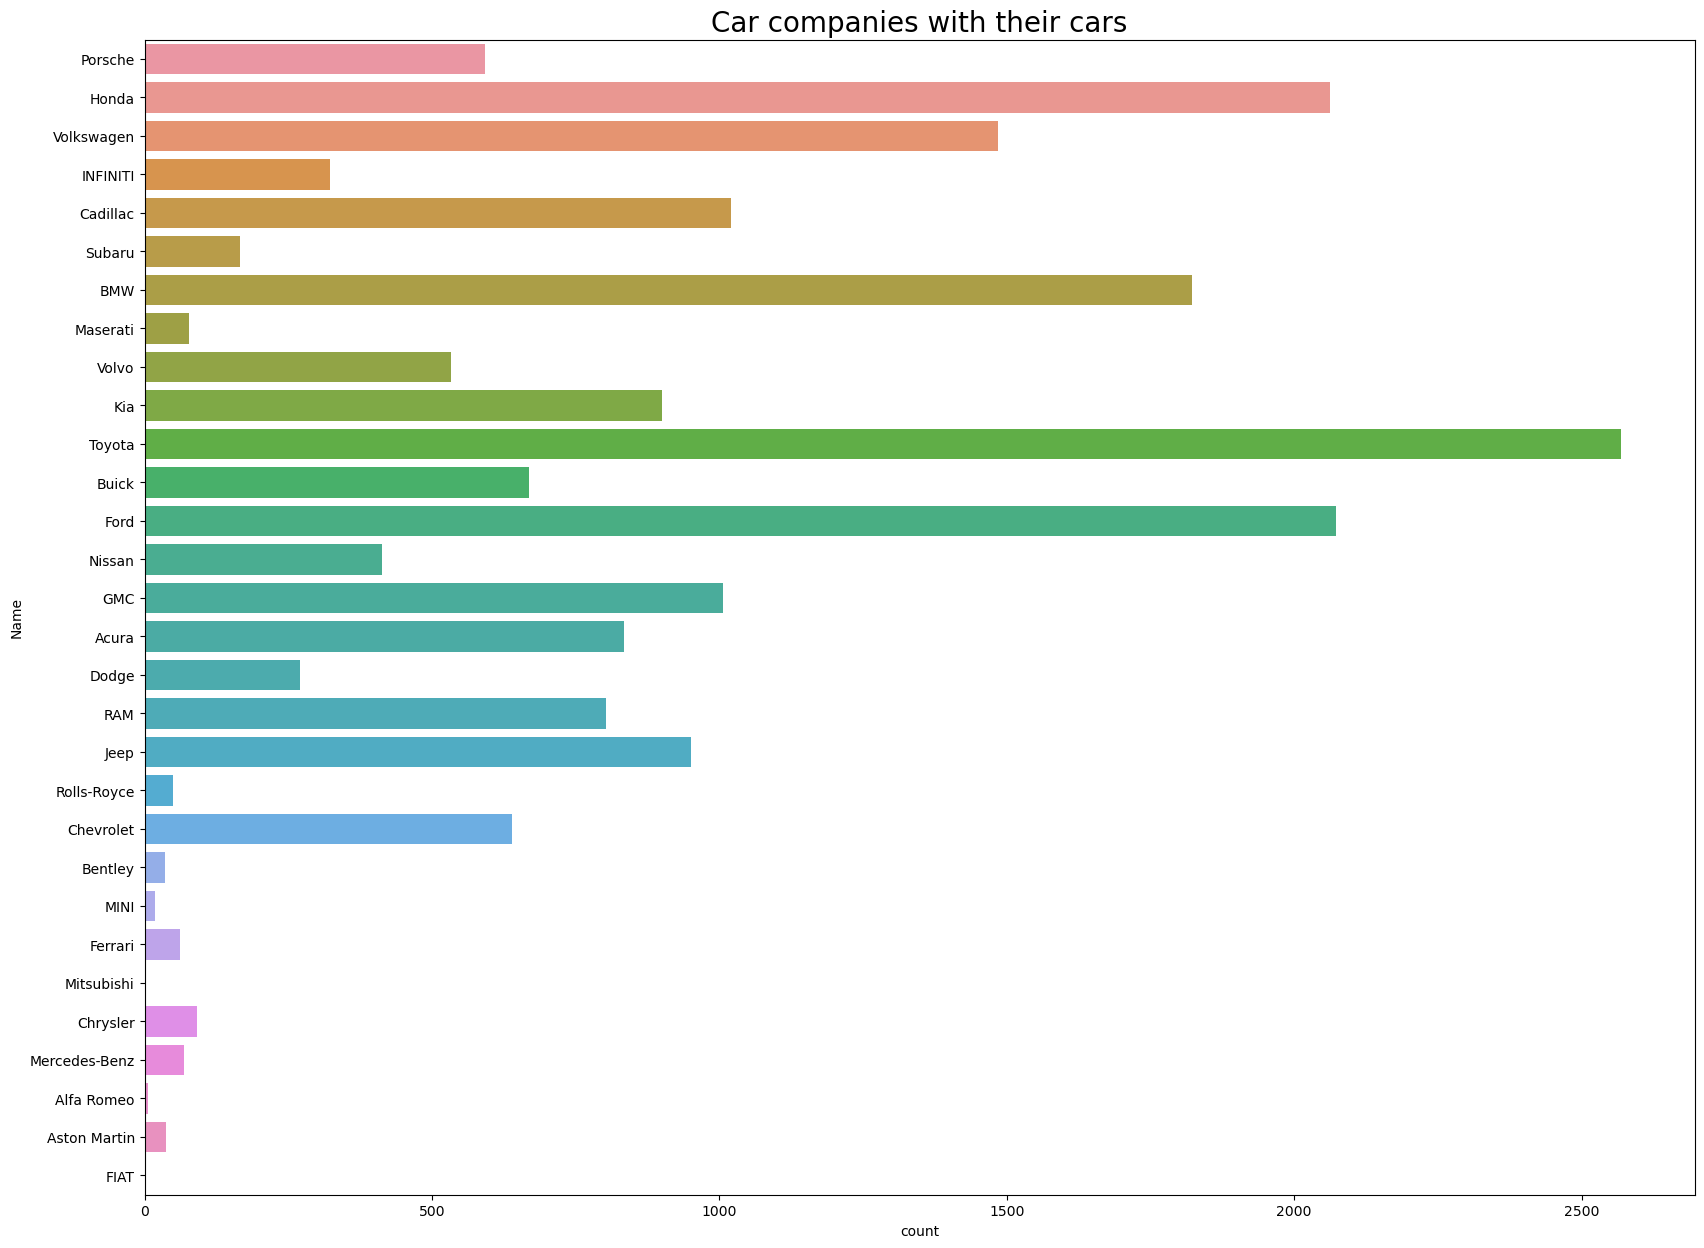

In [45]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.Name)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

In [46]:
df['Year'] = df['Year'].astype(int)

In [47]:
df['Name'] = df['Name'].astype('string')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19577 entries, 0 to 19576
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             19577 non-null  string
 1   Vehicle_details  19577 non-null  object
 2   Mileage          19577 non-null  object
 3   Rating           19577 non-null  object
 4   Rating-Count     19577 non-null  object
 5   Price            19577 non-null  object
 6   Deal-Status      19577 non-null  object
 7   Year             19577 non-null  int64 
 8   Status           19577 non-null  object
dtypes: int64(1), object(7), string(1)
memory usage: 1.3+ MB


In [49]:
df.Year.value_counts()

2020    5457
2021    5272
2022    4618
2019    2205
2018    1597
2017     216
2023      82
2016      67
2014      23
2015      19
2013      11
2012       4
2011       4
2010       2
Name: Year, dtype: int64